# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [34]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [36]:
#heroes_df.drop(columns='heroes_df['0']', inplace=True)
heroes_df.info()
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [37]:
heroes_df.info()
#heroes_df.isna().any()

heroes_df.isna().sum()
#heroes_df.Publisher.value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [38]:
powers_df.info()

powers_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [39]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Fallen One II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [40]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [41]:

heroes_df['Weight'].fillna(heroes_df.Weight.mean(), inplace=True)

#In publisher column there are 15 missing rows, I decided to keep the rows becauese they would not matter in calculations for the sake of keeping the rest of the data in those columns. 
#there are teo missing values in weight column. I replaced those with the mean of the column.  
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [42]:
powers_df.info()
powers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Fallen One II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [43]:
powers_df.isna().any().any()
#this code returns True, if there is any mising data in the entire dataframe. 
#Since it is False , we can say that there is no missing data.

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [44]:
#joined=heroes_df.join(powers_df)

In [45]:
joined = powers_df.set_index('hero_names').join(heroes_df.set_index('name'), how='inner')
joined.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [46]:
joined.isna().sum()

Agility                   0
Accelerated Healing       0
Lantern Power Ring        0
Dimensional Awareness     0
Cold Resistance           0
Durability                0
Stealth                   0
Energy Absorption         0
Flight                    0
Danger Sense              0
Underwater breathing      0
Marksmanship              0
Weapons Master            0
Power Augmentation        0
Animal Attributes         0
Longevity                 0
Intelligence              0
Super Strength            0
Cryokinesis               0
Telepathy                 0
Energy Armor              0
Energy Blasts             0
Duplication               0
Size Changing             0
Density Control           0
Stamina                   0
Astral Travel             0
Audio Control             0
Dexterity                 0
Omnitrix                  0
                         ..
Matter Absorption         0
The Force                 0
Resurrection              0
Terrakinesis              0
Vision - Heat       

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

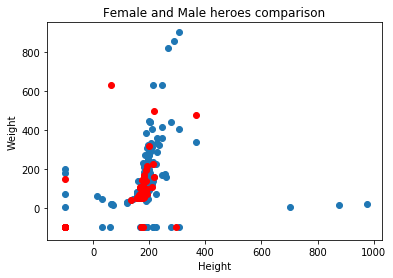

In [47]:
m_heroes=joined[joined['Gender']=='Male']
f_heroes=joined[joined['Gender']=='Female']

#x1=[m_heroes['Weight'].mean(), f_heroes['Weight'].mean()]
#y1=[m_heroes['Height'].mean(), f_heroes['Height'].mean()]
#label=['Male', 'Female']

y1=[m_heroes['Weight']]
x1=[m_heroes['Height']]
y2=[f_heroes['Weight']]
x2=[f_heroes['Height']]

plt.xlabel("Height")
plt.title("Female and Male heroes comparison")
plt.ylabel('Weight')

plt.scatter(x1,y1)
plt.scatter(x2,y2, color="red")


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [48]:
male_heroes_df = joined[joined['Gender']=='Male']
female_heroes_df =joined[joined['Gender']=='Female']

"""def show_distplot(dataframe, gender, column_name):
    
    y=[dataframe[column_name]]
    x=[dataframe[column_name]]
    plt.xlabel("Height")
    plt.title("Female and Male heroes comparison")
    plt.ylabel('Weight')

    plt.scatter(x,y)
    pass   """


def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()
    pass

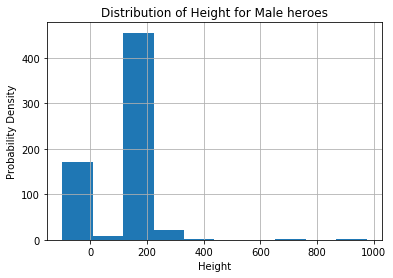

mean hight for males 117.08405172413794
Median height for males 183.0
Mode height for males 0   -99.0
dtype: float64


In [49]:
# Male Height
show_distplot(joined, 'Male', 'Height')
print('mean hight for males {}'.format( male_heroes_df.Height.mean()))
print('Median height for males {}'.format( male_heroes_df.Height.median()))
print('Mode height for males {}'.format( male_heroes_df.Height.mode()))

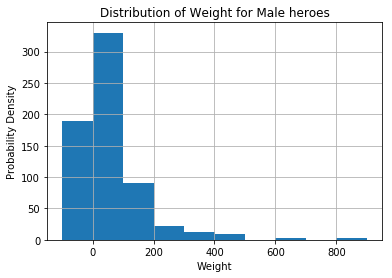

Mean weight for males 59.25615342943282
Median weight for males 79.0
Mode weight for males 0   -99.0
dtype: float64


In [50]:
# Male Weight
show_distplot(joined, 'Male', 'Weight')
print('Mean weight for males {}'.format( male_heroes_df.Weight.mean()))
print('Median weight for males {}'.format( male_heroes_df.Weight.median()))
print('Mode weight for males {}'.format( male_heroes_df.Weight.mode()))

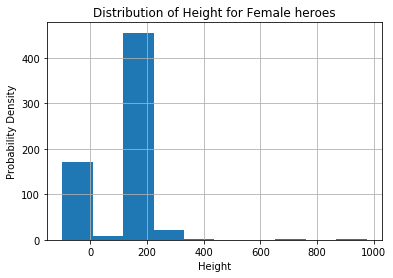

mean hight for females 111.6938202247191
Median height for females 168.0
Mode height for females 0   -99.0
dtype: float64


In [51]:
# Female Height
show_distplot(joined, 'Female', 'Height')
print('mean hight for females {}'.format( female_heroes_df.Height.mean()))
print('Median height for females {}'.format( female_heroes_df.Height.median()))
print('Mode height for females {}'.format( female_heroes_df.Height.mode()))

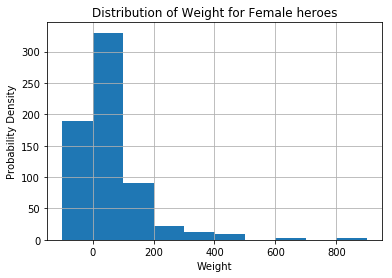

mean weight for females 36.651685393258425
Median weight for females 54.5
Mode weight for females 0   -99.0
dtype: float64


In [52]:
# Female Weight
show_distplot(joined, 'Female', 'Weight')
print('mean weight for females {}'.format( female_heroes_df.Weight.mean()))
print('Median weight for females {}'.format( female_heroes_df.Weight.median()))
print('Mode weight for females {}'.format(female_heroes_df.Weight.mode()))

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
Most of the male heroes are 160-210 inches high
Most of the male heroes are 0-100 lb
Most of the female heroes are 160-210 inches high
Most of the female heroes are 0-100 lb

Mode seems -99 for all these colomns. My understanding is -99 is the space holder for missing values on those columns. Beacuse negative value does not make sense. this data also effect the mean and median calculation in a wrong way. 
There are also some outliers after 500 value. I will modify the dataframes for genders accordingly.  




In [53]:
male_heroes_df = male_heroes_df[male_heroes_df['Weight']>0]
male_heroes_df = male_heroes_df[male_heroes_df['Weight']<500]
male_heroes_df = male_heroes_df[male_heroes_df['Height']>0]
male_heroes_df = male_heroes_df[male_heroes_df['Height']<500]


In [54]:
female_heroes_df = female_heroes_df[female_heroes_df['Weight']>0]
female_heroes_df = female_heroes_df[female_heroes_df['Weight']<500]
female_heroes_df = female_heroes_df[female_heroes_df['Height']>0]
female_heroes_df = female_heroes_df[female_heroes_df['Height']<500]

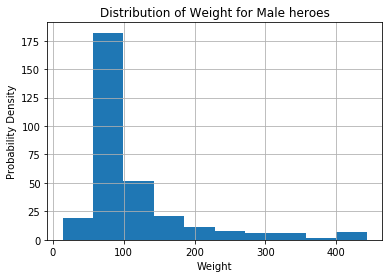

Mean weight for males 117.3211948766141
Median weight for males 90.0
Mode weight for males 0    79.0
dtype: float64


In [55]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for males {}'.format( male_heroes_df.Weight.mean()))
print('Median weight for males {}'.format( male_heroes_df.Weight.median()))
print('Mode weight for males {}'.format( male_heroes_df.Weight.mode()))

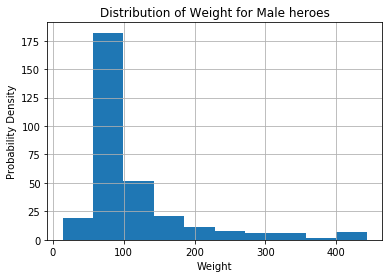

Mean weight for males 117.3211948766141
Median weight for males 90.0
Mode weight for males 0    79.0
dtype: float64


In [56]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for males {}'.format( male_heroes_df.Weight.mean()))
print('Median weight for males {}'.format( male_heroes_df.Weight.median()))
print('Mode weight for males {}'.format( male_heroes_df.Weight.mode()))

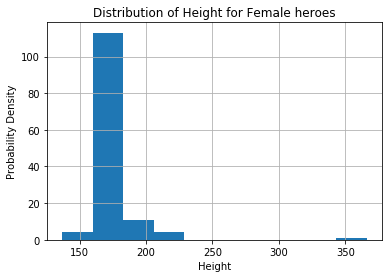

mean hight for females 174.68421052631578
Median height for females 170.0
Mode height for females 0    168.0
dtype: float64


In [57]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('mean hight for females {}'.format( female_heroes_df.Height.mean()))
print('Median height for females {}'.format( female_heroes_df.Height.median()))
print('Mode height for females {}'.format( female_heroes_df.Height.mode()))

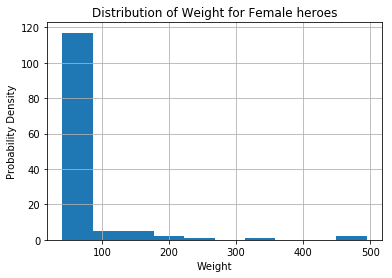

mean weight for females 75.203007518797
Median weight for females 57.0
Mode weight for females 0    54.0
dtype: float64


In [58]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('mean weight for females {}'.format( female_heroes_df.Weight.mean()))
print('Median weight for females {}'.format( female_heroes_df.Weight.median()))
print('Mode weight for females {}'.format(female_heroes_df.Weight.mode()))

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [59]:

powers=powers_df[powers_df==True].count()
popular_powers=powers.sort_values(ascending=False).iloc[:5]
print("The most popular powers are: ")
popular_powers


The most popular powers are: 


Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [60]:
"""marvel=joined[joined['Publisher']=='Marvel Comics']
marvel_p=pd.merge(marvel, powers_df, how='inner')
populer_marvel_powers= marvel_p[marvel_p==True].count().sort_values(ascending=False).iloc[:5]
populer_marvel_powers"""
#first I have coded to calculate one by one then I convert into a function 

def top5power(publisher):
    pub=joined[joined['Publisher']==publisher]
    pub_p=pd.merge(pub, powers_df, how='inner')
    populer_powers= pub_p[pub_p==True].count().sort_values(ascending=False).iloc[:5]
    print ('total number of heroes of ' ,publisher, 'is ' )
    print ("TOP 5 powers for ", publisher, ":")
    return populer_powers
top5power('Marvel Comics')

total number of heroes of  Marvel Comics is 
TOP 5 powers for  Marvel Comics :


Super Strength    221
Durability        168
Stamina           156
Super Speed       138
Agility           130
dtype: int64

In [61]:
top5power('DC Comics')

total number of heroes of  DC Comics is 
TOP 5 powers for  DC Comics :


Super Strength    122
Intelligence      106
Stamina           101
Flight             90
Super Speed        85
dtype: int64

In [62]:

def top5powerpercentage(publisher):
    pub=joined[joined['Publisher']==publisher]
    pub_p=pd.merge(pub, powers_df, how='inner')
    populer_powers= pub_p[pub_p==True].count().sort_values(ascending=False).iloc[:5]
    print ("TOP 5 powers for ", publisher, ":")
    return populer_powers/len(pub)

#I wanted to see the percentages of powers so I defined this function

In [63]:
top5powerpercentage('DC Comics')

TOP 5 powers for  DC Comics :


Super Strength    0.622449
Intelligence      0.540816
Stamina           0.515306
Flight            0.459184
Super Speed       0.433673
dtype: float64

In [64]:
top5powerpercentage('Marvel Comics')

TOP 5 powers for  Marvel Comics :


Super Strength    0.648094
Durability        0.492669
Stamina           0.457478
Super Speed       0.404692
Agility           0.381232
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:

Marvel uses all of the most popular powers overall. While flight and inteligance are not among the most popular powers, 
DC uses them very often. But they are not among the top five powers of Marvel. Super strenght is the most popular for both publishers.
Durability and Agility are in top 5 for Marvel while DC does not use them that often. Marvel seems following the overall trend closely. 

____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [83]:
#I merged the 4 cols from heroes_df and all powers_df.

extr=pd.merge(powers_df,heroes_df[['name','Weight', 'Height', 'Gender']], right_on='name', left_on='hero_names', how='inner')
female = extr[extr['Gender']=='Female']
female.head()
#heroes_df.loc[:[heroes_df['Publisher']]]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,name,Weight,Height,Gender
22,Angel Dust,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Angel Dust,57.0,165.0,Female
23,Angel Salvadore,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,Angel Salvadore,54.0,163.0,Female
24,Angela,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Angela,-99.0,-99.0,Female
36,Arachne,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,Arachne,63.0,175.0,Female
38,Arclight,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,Arclight,57.0,173.0,Female


In [92]:
heroes_df.head()
#powers_df.head()_
powers_df[powers_df==True]
powers_df
            

TypeError: can only concatenate str (not "numpy.bool_") to str

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data